In [110]:
import tensorflow as tf
import keras
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [109]:
#loading the data
def load_data(path):
    loaded_data = loadmat(path)
    return loaded_data['X'], loaded_data['y']

X_train, Y_train = load_data('train_32x32.mat')
X_test, Y_test = load_data('test_32x32.mat')
X_train_original = X_train
X_test_original = X_test

In [56]:
#changing the shape of the training and the test dataset
X_train = X_train.transpose((3, 0, 1, 2))
X_test = X_test.transpose((3, 0, 1, 2))

In [57]:
#converting 2-D array into 1-D array
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

In [58]:
#changing the label of 0 from 10 to 0
Y_train[Y_train==10] = 0
Y_test[Y_test==10] = 0

In [59]:
X_train_original = X_train
Y_train_original = Y_train
X_test_original = X_test

In [60]:
#splitting the training set into training and validation set using sklearn
#using random_state to generate the same sets everytime
X_train, X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.15, random_state=3)



In [61]:
#converting array of ints to array of floats for arithmetic operations
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [62]:
rgb2grey = [0.2990, 0.5870, 0.1140]
X_train = np.expand_dims(np.dot(X_train, rgb2grey), axis=3)
X_val = np.expand_dims(np.dot(X_val, rgb2grey), axis=3)
X_test = np.expand_dims(np.dot(X_test, rgb2grey), axis=3)

In [63]:
#normalising the training data for better training
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_normalised = (X_train-train_mean)/train_std
X_val_normalised = (X_val-train_mean)/train_std
X_test_normalised = (X_test-train_mean)/train_std


In [64]:
#one-hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [65]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    #compiling the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [66]:
model = create_model()

In [55]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_val,Y_val))


Train on 62268 samples, validate on 10989 samples
Epoch 1/20
62268/62268 [==============================] - 147s 2ms/step - loss: 2.1329 - accuracy: 0.2615 - val_loss: 1.2492 - val_accuracy: 0.5911
Epoch 2/20
62268/62268 [==============================] - 134s 2ms/step - loss: 1.0903 - accuracy: 0.6556 - val_loss: 0.7528 - val_accuracy: 0.7701
Epoch 3/20
62268/62268 [==============================] - 126s 2ms/step - loss: 0.7815 - accuracy: 0.7616 - val_loss: 0.6625 - val_accuracy: 0.7944
Epoch 4/20
62268/62268 [==============================] - 132s 2ms/step - loss: 0.6964 - accuracy: 0.7875 - val_loss: 0.6160 - val_accuracy: 0.8114
Epoch 5/20
62268/62268 [==============================] - 136s 2ms/step - loss: 0.6306 - accuracy: 0.8085 - val_loss: 0.5652 - val_accuracy: 0.8298
Epoch 6/20
62268/62268 [==============================] - 135s 2ms/step - loss: 0.5874 - accuracy: 0.8229 - val_loss: 0.5436 - val_accuracy: 0.8337
Epoch 7/20
62268/62268 [==============================] - 120s

In [56]:
scores = model.evaluate(X_test, Y_test, verbose = 1)

26032/26032 [==============================] - 15s 587us/step


In [57]:
model.save('street_view_house_numbers_model.h5')

In [90]:
# load Model
from keras.models import load_model
model = load_model('street_view_house_numbers_model.h5')


In [108]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 32, 32, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('2.png',)
	# load model
	model = load_model('street_view_house_numbers_model.h5')
	# predict the class
	digit = model.predict(img)
	print(digit)
 
# entry point, run the example
run_example()

[[0.0455196  0.48512074 0.08429645 0.09175264 0.03787462 0.02981758
  0.04336499 0.04165326 0.10322829 0.03737176]]


In [68]:
model = keras.models.load_model('street_view_house_numbers_model.h5')

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [70]:
model

In [71]:
test_x_predictions = model.predict(X_test[949:952])
test_x_predictions 

array([[2.82048295e-05, 3.17938145e-07, 6.42431530e-09, 6.20438470e-07,
        3.41814570e-07, 1.68127226e-04, 9.36656535e-01, 1.39847075e-11,
        6.31457120e-02, 1.38767405e-07],
       [6.37546997e-04, 8.74908362e-03, 1.16080560e-01, 5.47545969e-01,
        1.77372748e-03, 2.43324041e-03, 8.17135256e-03, 2.87694950e-03,
        3.05181295e-01, 6.55031763e-03],
       [6.58985972e-03, 5.78475374e-05, 2.95725786e-05, 2.06214434e-04,
        1.76948801e-04, 3.31104035e-03, 9.18534398e-01, 8.44154954e-07,
        7.09552094e-02, 1.37984622e-04]], dtype=float32)

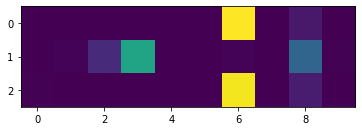

In [72]:
 plt.imshow(test_x_predictions)

In [ ]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
#loading the data
def load_data(path): 
    loaded_data = loadmat(path)
    return loaded_data['X'], loaded_data['y']

X_train, Y_train = load_data('train_32x32.mat')
X_test, Y_test = load_data('test_32x32.mat')
X_train_original = X_train
X_test_original = X_test

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
#changing the shape of the training and the test dataset
X_train = X_train.transpose((3, 0, 1, 2))
X_test = X_test.transpose((3, 0, 1, 2))


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.ndim

In [ ]:
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

In [ ]:
Y_train.ndim

In [ ]:
np.unique(Y_test)

In [ ]:
#changing the label of 0 from 10 to 0
Y_train[Y_train==10] = 0
Y_test[Y_test==10] = 0

In [ ]:
np.unique(Y_test)

In [ ]:
 plt.imshow(X_train[10600])

In [ ]:
X_train_original = X_train
Y_train_original = Y_train
X_test_original = X_test

In [ ]:
#splitting the training set into training and validation set using sklearn
#using random_state to generate the same sets everytime
X_train, X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.15, random_state=3)


In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
Y_train.shape

In [ ]:
Y_val.shape

In [ ]:
#converting array of ints to array of floats for arithmetic operations
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
test = np.expand_dims(np.dot(X_train[0], rgb2grey), axis=2)

In [ ]:
test.shape

In [ ]:
plt.imshow(test[:,:,0], cmap="gray")

In [ ]:
#converting rgb images to grayscale images for faster computations
rgb2grey = [0.2990, 0.5870, 0.1140]
X_train = np.expand_dims(np.dot(X_train, rgb2grey), axis=3)
X_val = np.expand_dims(np.dot(X_val, rgb2grey), axis=3)
X_test = np.expand_dims(np.dot(X_test, rgb2grey), axis=3)

In [ ]:
X_train.shape

In [ ]:
#normalising the training data for better training
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_normalised = (X_train-train_mean)/train_std
X_val_normalised = (X_val-train_mean)/train_std
X_test_normalised = (X_test-train_mean)/train_std

In [ ]:
Y_val.shape

In [ ]:
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
Y_train.shape

In [ ]:
Y_val.shape

In [ ]:
Y_train

In [ ]:
Y_val

In [ ]:
print('')